#Question:1--Implementation of neural network

## Importing all the libraries that are required

In [ ]:
import numpy as np
import pickle
from keras.datasets import mnist
from keras.utils import np_utils

#Base Layer

In [ ]:
#Layer class implemented as base class
class Layer:
    def __init__(self):
        self.neural_input = None #neural inputs and outputs using constructors
        self.neural_output = None 
 
    def neural_forward_propagation(self, neural_input): #computing results 
        raise NotImplementedError
    
    #Implementating backward propogation 
    def neural_backward_propagation(self, out_error, lr_rate): 
        raise NotImplementedError

#Neural Layer 

In [ ]:
#neural layer that help train the models based on inputs 
class Neural_layer(Layer): 
    def __init__(self, net_size, out_size): #taking neural size and output size
        self.weights = np.random.rand(net_size, out_size) - 0.5 #neural weights 
        self.total_bias = np.random.rand(1, out_size) - 0.5  #bias for improving the model performance

    def neural_backward_propagation(self, out_error, lr_rate): #backward propagation 
        inputError = np.dot(out_error, self.weights.T)   # input error using weights and output error values 
        weights_error = np.dot(self.neural_input.T, out_error)
        self.weights -= lr_rate * weights_error # weights with learning rate 
        self.total_bias -= lr_rate * out_error #total bias 
        return inputError 

    def neural_forward_propagation(self, InputData): #forward propagation
        self.neural_input = InputData  
        self.neural_output = np.dot(self.neural_input, self.weights) + self.total_bias # calculating the neural weights 
        return self.neural_output 

#ActivationLayer

In [ ]:
#activation layer which is used for producing the specific outputs 
class ActivationLayer(Layer):
    def __init__(self, ActivationFunction, activation_net_forward):
        self.ActivationFunction = ActivationFunction  # activatio fucntion such as tanh
        self.activation_net_forward = activation_net_forward #forward activation function
      
    def neural_backward_propagation(self, out_error, lr_rate): #backward propagation layers 
        return self.activation_net_forward(self.neural_input) * out_error   #forward layer with neural inputs 
    
    #forward propagation 
    def neural_forward_propagation(self, InputData):
        self.neural_input = InputData
        self.neural_output = self.ActivationFunction(self.neural_input) #neural output using forward propagation 
        return self.neural_output
    

#All Activation function 

#Forward activation layers 

In [ ]:
#all forward activation functions
def forw_tanh(x):  #tanh fucntions 
    return np.tanh(x)

def forw_softmax(x): #softmax functions
  return np.exp(x) / float(sum(np.exp(x)))

def forw_sigmoid(x): #sigmoid functions 
  return 1/(1+np.exp(-x))

def forw_mse(y_true, y_pred): #mean squared error to check the accuracy 
    return np.mean(np.power(y_true-y_pred, 2))

#Backward activation layers

In [ ]:
#all backward activation functions
def bac_tanh(x): #tanh fucntions 
    return 1-np.tanh(x)**2

def bac_sigmoid(x): #tanh fucntions 
  return forw_sigmoid(x)*(1-forw_sigmoid(x))

def bac_softmax(x): #sigmoid functions 
  return np.exp(forw_softmax(x)) / float(sum(np.exp(forw_softmax(x))))

def bac_mse(y_true, y_pred): #mean squared error to check the accuracy
    return 2*(y_pred-y_true)/y_true.size

# Neural Netowrk for creating sequential model 

In [ ]:
class NeuralNet:
    def __init__(self):
        self.net_layers = []
        self.for_prop_loss = None
        self.bac_prop_loss = None

    #creating nodes of layer in sequence 
    def sequential_layers(self, layer):
        self.net_layers.append(layer)

    # checking loss for both back and forward propagation
    def finding_loss(self, for_prop_loss, bac_prop_loss):
        self.for_prop_loss = for_prop_loss
        self.bac_prop_loss = bac_prop_loss

    # prediction based on model weights 
    def model_predict(self, InputData):
        neural_depth = len(InputData) 
        observed_predicted_results = []
        for i in range(neural_depth):
            neural_output = InputData[i]
            for layer in self.net_layers:
                neural_output = layer.neural_forward_propagation(neural_output)
            observed_predicted_results.append(neural_output) #predicting based on data to check the overall accuracy 
        return observed_predicted_results

    # For training the neural network 
    def fit_function(self, XTrain, YTrain, epochs, lr_rate):
        # getting the dimension of the training data 
        neural_depth = len(XTrain)
        model_error_values=[]
        # training till the total number of epochs 
        for i in range(epochs):
            error_rate = 0
            for j in range(neural_depth): 
                neural_output = XTrain[j] #neural training weights 
                for layer in self.net_layers:
                    neural_output = layer.neural_forward_propagation(neural_output)
                # checking error rate 
                error_rate += self.for_prop_loss(YTrain[j], neural_output)
                # model based on propagation data 
                error = self.bac_prop_loss(YTrain[j], neural_output)
                for layer in reversed(self.net_layers):
                    error = layer.neural_backward_propagation(error, lr_rate)

            # Average error rate for the model
            error_rate /= neural_depth
            print('number of epochs %d/%d   total rate of error=%f' % (i+1, epochs, error_rate))
            model_error_values.append(error_rate)
        return model_error_values


# Using pickle for dumping the seralized values that can be used for prediction

In [ ]:
def Model_weight_dump(model, name):
  pickle.dump(model, open(name, 'wb'))

#Question2 : Performing testing over the model using XOR values

In [ ]:
training_data = np.array([[[0,0]], [[0,1]], [[1,0]], [[1,1]]])
testing_data = np.array([[[0]], [[1]], [[1]], [[0]]])

#Creating sequential model for traning the above data

In [ ]:
#sequential models 
Gate_network_XOR = NeuralNet()
Gate_network_XOR.sequential_layers(Neural_layer(2, 3)) #adding layer of having shape 2,3
Gate_network_XOR.sequential_layers(ActivationLayer(forw_tanh, bac_tanh))
Gate_network_XOR.sequential_layers(Neural_layer(3, 1)) #adding layer of having shape 3,1
Gate_network_XOR.sequential_layers(ActivationLayer(forw_sigmoid, bac_sigmoid))

#Training model and testing based on error rate 

In [ ]:
# training the inputs on the designed neural net
Gate_network_XOR.finding_loss(forw_mse, bac_mse)
loss=Gate_network_XOR.fit_function(training_data, testing_data, epochs=1000, lr_rate=0.1)

number of epochs 1/1000   total rate of error=0.257864
number of epochs 2/1000   total rate of error=0.257545
number of epochs 3/1000   total rate of error=0.257263
number of epochs 4/1000   total rate of error=0.257015
number of epochs 5/1000   total rate of error=0.256795
number of epochs 6/1000   total rate of error=0.256601
number of epochs 7/1000   total rate of error=0.256428
number of epochs 8/1000   total rate of error=0.256275
number of epochs 9/1000   total rate of error=0.256138
number of epochs 10/1000   total rate of error=0.256016
number of epochs 11/1000   total rate of error=0.255907
number of epochs 12/1000   total rate of error=0.255808
number of epochs 13/1000   total rate of error=0.255720
number of epochs 14/1000   total rate of error=0.255639
number of epochs 15/1000   total rate of error=0.255567
number of epochs 16/1000   total rate of error=0.255500
number of epochs 17/1000   total rate of error=0.255440
number of epochs 18/1000   total rate of error=0.255384
n

In [ ]:
# results predicted after training the models
output = Gate_network_XOR.model_predict(training_data)
print(output)

[array([[0.06622532]]), array([[0.91404257]]), array([[0.91195343]]), array([[0.06170399]])]


In [ ]:
#Svaing model_weights 
Model_weight_dump(Gate_network_XOR, 'XOR_solved.w')

#Question3: ---Handwritten Digit Recognition using the build neural network 

#loading mnist data using sklearn 

In [ ]:
#splitting data into training and testing 
(XTrain, YTrain), (XTest, YTest) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


#Dataset peparation and scaling to specific shapes  

In [ ]:
XTrain = XTrain.reshape(XTrain.shape[0], 1, 28*28) #reshaping 
XTrain = XTrain.astype('float32') #coverting to float values 
XTrain /= 255 #rescaling of values 

#Encoding of data 

In [ ]:
YTrain = np_utils.to_categorical(YTrain)

In [ ]:
XTrain.shape

(60000, 1, 784)

#For testing data :--Scaling and processing

In [ ]:
#for testing data 
XTest = XTest.reshape(XTest.shape[0], 1, 28*28)
XTest = XTest.astype('float32') #converting to float 
XTest /= 255 #rescaling of values 

In [ ]:
XTest.shape

(10000, 1, 784)

#Encoding to categorical values 

In [ ]:
YTest = np_utils.to_categorical(YTest) 

#Creating model architecture along with performing hypertunning and testing to suggest which model is best

### For first model having all the input sizes 0 the model will throw error which leads to problem in predicting the digits 

### Or another model, second neural netowrk having random values between -10 to 10, model is not aligned and throw error and leads to bad prediction

###Third model neural network 

In [ ]:
mnist_model_11 = NeuralNet() #sequential models 
mnist_model_11.sequential_layers(Neural_layer(28*28, 100))      #adding layers           
mnist_model_11.sequential_layers(ActivationLayer(forw_tanh, bac_tanh))  #forward and backward layers
mnist_model_11.sequential_layers(Neural_layer(100, 50))            # another layer having filter of 100 and 50         
mnist_model_11.sequential_layers(ActivationLayer(forw_tanh, bac_tanh)) #forward and backward layers
mnist_model_11.sequential_layers(Neural_layer(50, 10))         # another layer having filter of 50 and 10            
mnist_model_11.sequential_layers(ActivationLayer(forw_tanh, bac_tanh)) #forward and backward layers

#Model with learning rate ==1

In [ ]:
mnist_model_11.finding_loss(forw_mse, bac_mse)
loss11=mnist_model_11.fit_function(XTrain[0:1000], YTrain[0:1000], epochs=35, lr_rate=1)

number of epochs 1/35   total rate of error=0.917489
number of epochs 2/35   total rate of error=0.909127
number of epochs 3/35   total rate of error=0.965242
number of epochs 4/35   total rate of error=0.941996
number of epochs 5/35   total rate of error=0.976116
number of epochs 6/35   total rate of error=0.976099
number of epochs 7/35   total rate of error=0.976295
number of epochs 8/35   total rate of error=0.974807
number of epochs 9/35   total rate of error=0.977155
number of epochs 10/35   total rate of error=0.921280
number of epochs 11/35   total rate of error=0.904081
number of epochs 12/35   total rate of error=0.909443
number of epochs 13/35   total rate of error=0.906730
number of epochs 14/35   total rate of error=0.898865
number of epochs 15/35   total rate of error=0.895475
number of epochs 16/35   total rate of error=0.918206
number of epochs 17/35   total rate of error=0.939999
number of epochs 18/35   total rate of error=0.939999
number of epochs 19/35   total rate o

Text(0.5, 0, 'Total epochs')

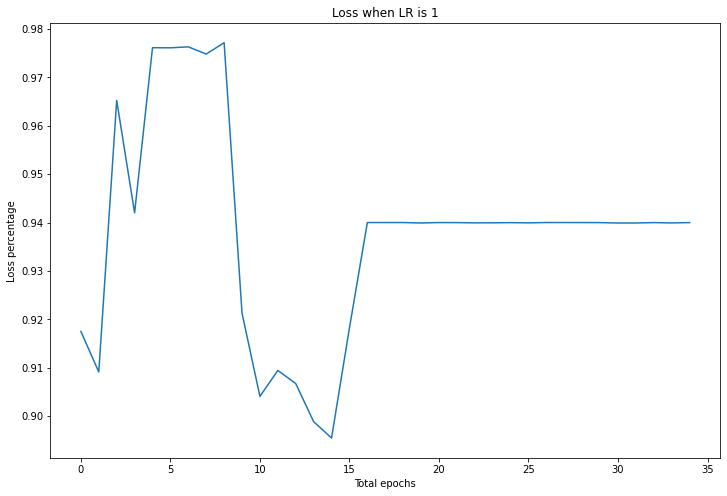

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.plot(loss11)
plt.title('Loss when LR is 1')
plt.ylabel('Loss percentage')
plt.xlabel('Total epochs')

#Prediction 

In [ ]:
model_pred = mnist_model_11.model_predict(XTest[0:3])
print('Prediction -', model_pred)
print('\n')
print('True values--',YTest[0:3]) 

Prediction - [array([[ 1.        ,  1.        ,  0.9999993 ,  0.99999999,  1.        ,
         0.99999916,  0.99999989,  1.        ,  1.        , -1.        ]]), array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         0.99999681,  1.        ,  1.        ,  0.99999999, -1.        ]]), array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  0.99999977,  1.        ,  1.        , -0.9999956 ]])]


True values-- [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


#Model with LR Rate==0.001

In [ ]:
mnist_digit22 = NeuralNet()  #adding layers
mnist_digit22.sequential_layers(Neural_layer(28*28, 100))   # another layer having size 28*28             
mnist_digit22.sequential_layers(ActivationLayer(forw_tanh, bac_tanh)) #forward and backward layers
mnist_digit22.sequential_layers(Neural_layer(100, 50))       # another layer having filter of 100 and 50             
mnist_digit22.sequential_layers(ActivationLayer(forw_tanh, bac_tanh)) #forward and backward layers
mnist_digit22.sequential_layers(Neural_layer(50, 10))               # another layer having filter of 50 and 10      
mnist_digit22.sequential_layers(ActivationLayer(forw_tanh, bac_tanh)) #forward and backward layers

In [ ]:
mnist_digit22.finding_loss(forw_mse, bac_mse)
loss22=mnist_digit22.fit_function(XTrain[0:1000], YTrain[0:1000], epochs=35, lr_rate=0.001)

number of epochs 1/35   total rate of error=0.647329
number of epochs 2/35   total rate of error=0.587781
number of epochs 3/35   total rate of error=0.548526
number of epochs 4/35   total rate of error=0.517191
number of epochs 5/35   total rate of error=0.489101
number of epochs 6/35   total rate of error=0.463469
number of epochs 7/35   total rate of error=0.440256
number of epochs 8/35   total rate of error=0.419122
number of epochs 9/35   total rate of error=0.399617
number of epochs 10/35   total rate of error=0.381467
number of epochs 11/35   total rate of error=0.364515
number of epochs 12/35   total rate of error=0.348628
number of epochs 13/35   total rate of error=0.333693
number of epochs 14/35   total rate of error=0.319628
number of epochs 15/35   total rate of error=0.306369
number of epochs 16/35   total rate of error=0.293851
number of epochs 17/35   total rate of error=0.282009
number of epochs 18/35   total rate of error=0.270788
number of epochs 19/35   total rate o

Text(0.5, 0, 'Total epochs')

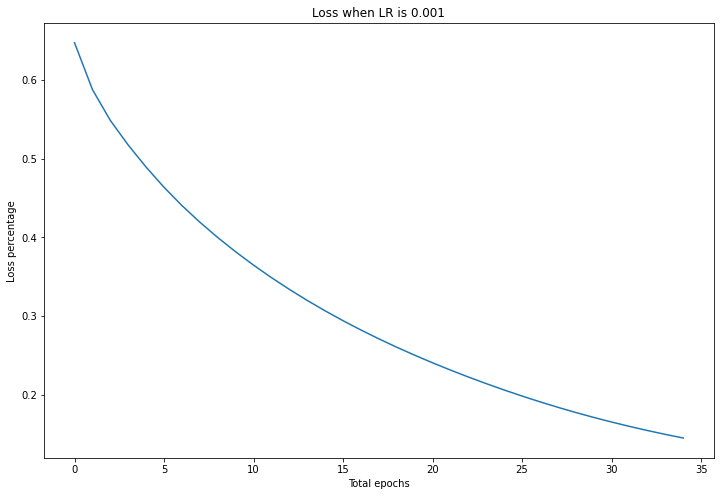

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(loss22)
plt.title('Loss when LR is 0.001')
plt.ylabel('Loss percentage')
plt.xlabel('Total epochs')

#Preidction on model having learning rate 0.001

In [ ]:
model_pred = mnist_digit22.model_predict(XTest[0:3])
print('Prediction -', model_pred)
print('\n')
print('True values--',YTest[0:3]) 

Prediction - [array([[ 0.4909318 , -0.13685365,  0.65308788,  0.46130742, -0.07681115,
         0.51600991,  0.08182465,  0.89850511,  0.16729128,  0.59140776]]), array([[ 0.66539468,  0.45498171,  0.180571  ,  0.80412846, -0.54941739,
        -0.06291782,  0.69771695,  0.75713478,  0.33904501, -0.50097754]]), array([[-0.21303377,  0.74237615,  0.70867052, -0.6982323 , -0.25751431,
        -0.00437131, -0.35053452,  0.85080021, -0.22428083, -0.46514764]])]


True values-- [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


#Learning rate ==0.01

In [ ]:
mnist_model33 = NeuralNet() #adding layers
mnist_model33.sequential_layers(Neural_layer(28*28, 100))  # another layer having size 28*28               
mnist_model33.sequential_layers(ActivationLayer(forw_tanh, bac_tanh))  #forward and backward layers
mnist_model33.sequential_layers(Neural_layer(100, 50))                    # another layer having filter of 100 and 50
mnist_model33.sequential_layers(ActivationLayer(forw_tanh, bac_tanh))   #forward and backward layers
mnist_model33.sequential_layers(Neural_layer(50, 10))                   # another layer having filter of 10 and 50 
mnist_model33.sequential_layers(ActivationLayer(forw_tanh, bac_tanh))    #forward and backward layers

#Model training 

In [ ]:
mnist_model33.finding_loss(forw_mse, bac_mse)
loss33=mnist_model33.fit_function(XTrain[0:1000], YTrain[0:1000], epochs=35, lr_rate=0.1)

number of epochs 1/35   total rate of error=0.230708
number of epochs 2/35   total rate of error=0.098162
number of epochs 3/35   total rate of error=0.074732
number of epochs 4/35   total rate of error=0.060408
number of epochs 5/35   total rate of error=0.052155
number of epochs 6/35   total rate of error=0.046311
number of epochs 7/35   total rate of error=0.041936
number of epochs 8/35   total rate of error=0.038594
number of epochs 9/35   total rate of error=0.035723
number of epochs 10/35   total rate of error=0.033159
number of epochs 11/35   total rate of error=0.031028
number of epochs 12/35   total rate of error=0.029159
number of epochs 13/35   total rate of error=0.027353
number of epochs 14/35   total rate of error=0.025710
number of epochs 15/35   total rate of error=0.024373
number of epochs 16/35   total rate of error=0.023045
number of epochs 17/35   total rate of error=0.021645
number of epochs 18/35   total rate of error=0.020444
number of epochs 19/35   total rate o

#Prediction

In [ ]:
pred33 = mnist_model33.model_predict(XTest[0:3])
print('Pred-', pred33)
print('\n')
print('true values--',YTest[0:3]) 

Pred- [array([[-0.03097408, -0.01972635, -0.09360265,  0.00833082, -0.03104617,
         0.04723067,  0.01498055,  0.96826363,  0.11918447, -0.02231588]]), array([[-0.02110444,  0.03998524,  0.24414929,  0.62538506, -0.14014229,
         0.38141083, -0.01893589, -0.07761392,  0.12532099, -0.03353518]]), array([[ 0.03028872,  0.90341422, -0.04756254,  0.28870859, -0.02539924,
         0.1509788 ,  0.00965437, -0.03251125,  0.21723331, -0.01665402]])]


true values-- [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


#Loss analysis 

Text(0.5, 0, 'Total epochs')

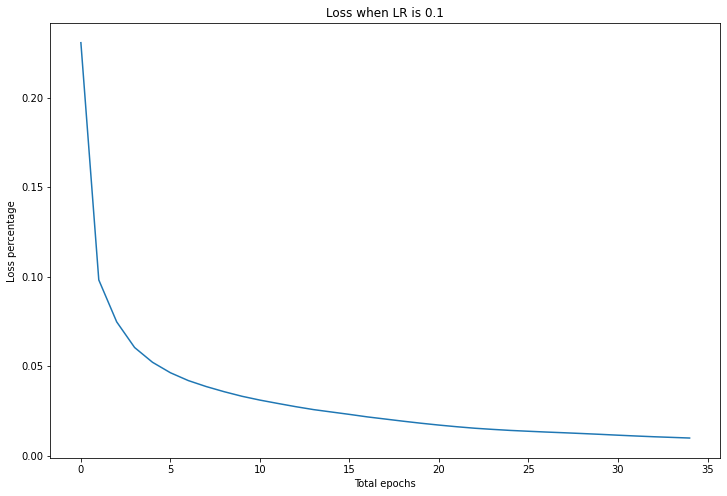

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(loss33)
plt.title('Loss when LR is 0.1')
plt.ylabel('Loss percentage')
plt.xlabel('Total epochs')